In [1]:
import sys

sys.path.append('..')

(array([10.,  6.,  9., 13., 14.,  6.,  9.,  9., 16.,  6.,  9., 14.,  8.,
        13., 11.,  5.,  5.,  8., 10.,  9.,  9.,  4., 13.,  8.,  6., 12.,
        10., 15., 12., 16., 10.,  8., 10.,  9., 12.,  5., 10.,  7., 14.,
        21., 15.,  9., 11., 12.,  7.,  7.,  4., 10.,  6.,  7., 13., 11.,
         7., 12., 13.,  4.,  7., 13., 14., 17.,  9., 10., 10., 12., 10.,
        11.,  9., 10., 10., 10., 12., 13.,  9., 13.,  8.,  9.,  9., 13.,
        10., 11.,  9., 14.,  7.,  9.,  8.,  9.,  5.,  6., 10., 12.,  9.,
        12., 10., 15., 11.,  5.,  7., 12.,  7., 15.]),
 array([1.67019430e-04, 1.01608560e-02, 2.01546926e-02, 3.01485292e-02,
        4.01423658e-02, 5.01362024e-02, 6.01300390e-02, 7.01238756e-02,
        8.01177122e-02, 9.01115488e-02, 1.00105385e-01, 1.10099222e-01,
        1.20093059e-01, 1.30086895e-01, 1.40080732e-01, 1.50074568e-01,
        1.60068405e-01, 1.70062242e-01, 1.80056078e-01, 1.90049915e-01,
        2.00043751e-01, 2.10037588e-01, 2.20031425e-01, 2.30025261e-01,
  

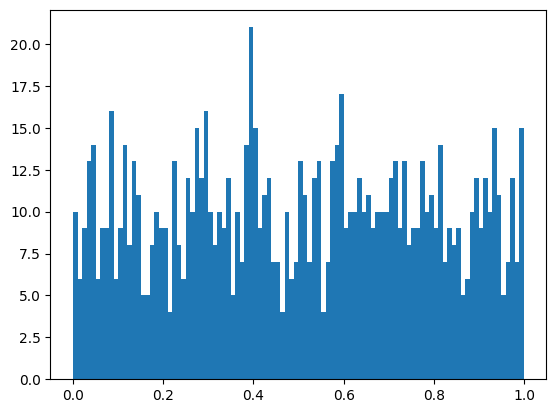

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Number of agents
N = 1000

# Wealth
wealth_arr = np.array([random.uniform(0, 1) for _ in range(N)])
plt.hist(wealth_arr, bins=100)  

In [3]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    if isinstance(arr, list):
        n = len(arr)
    elif isinstance(arr, np.ndarray):
        n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

gini(wealth_arr)

np.float64(0.3284415391946063)

In [4]:
from grid_search import run_model

df_model, df_agent = run_model({
    'num_steps':            100, 
    'wealth_arr':           wealth_arr[:100], 
    'fraction_stolen':      0.6, 
    'deterrence':           0.1
})

df_model

100%|██████████| 100/100 [00:00<00:00, 162.35it/s]


,crime_rate,gini_coef
0,0.00,0.371127
1,0.48,0.371127
2,0.67,0.449458
3,0.82,0.490427
4,0.88,0.579774
...,...,...
95,1.00,0.715153
96,1.00,0.706796
97,1.00,0.726747
98,1.00,0.732467


In [5]:
df_agent

criminal    wealth
Step AgentID                    
0    0           False  0.987336
     1           False  0.547676
     2           False  0.294522
     3           False  0.920554
     4           False  0.251433
...                ...       ...
99   43           True  0.390158
     73           True  0.267287
     83           True  0.120037
     10           True  0.033052
     91           True  0.032308

[10000 rows x 2 columns]

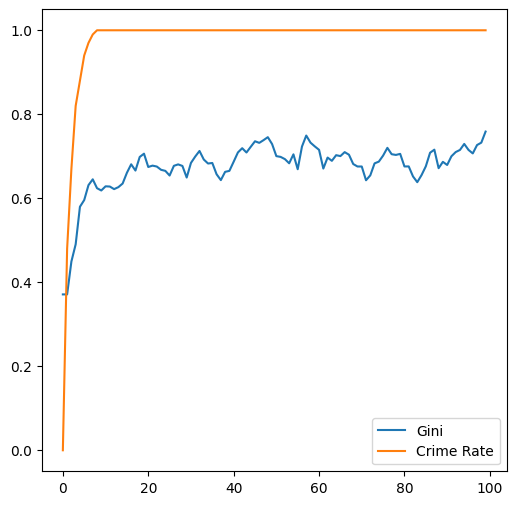

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[6,6])
ax.plot(df_model.index, df_model['gini_coef'], label='Gini')
ax.plot(df_model.index, df_model['crime_rate'], label='Crime Rate')
ax.legend()

In [8]:
from grid_search import run_grid_search

results = run_grid_search({
    'num_steps':            [150], 
    'wealth_arr':           [wealth_arr[:100]], 
    'fraction_stolen':      np.arange(0.0, 1.1, 0.1),
    'deterrence':           np.arange(0.6, 1, 0.05) 
})

results

Run 1/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.0
deterrence: 0.6


100%|██████████| 150/150 [00:00<00:00, 199.32it/s]


Done.

Run 2/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.0
deterrence: 0.65


100%|██████████| 150/150 [00:00<00:00, 170.54it/s]


Done.

Run 3/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.0
deterrence: 0.7000000000000001


100%|██████████| 150/150 [00:00<00:00, 195.83it/s]


Done.

Run 4/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.0
deterrence: 0.7500000000000001


100%|██████████| 150/150 [00:00<00:00, 199.61it/s]


Done.

Run 5/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.0
deterrence: 0.8000000000000002


100%|██████████| 150/150 [00:00<00:00, 210.12it/s]


Done.

Run 6/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.0
deterrence: 0.8500000000000002


100%|██████████| 150/150 [00:00<00:00, 204.57it/s]


Done.

Run 7/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.0
deterrence: 0.9000000000000002


100%|██████████| 150/150 [00:00<00:00, 218.84it/s]


Done.

Run 8/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.0
deterrence: 0.9500000000000003


100%|██████████| 150/150 [00:00<00:00, 244.81it/s]


Done.

Run 9/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.6


100%|██████████| 150/150 [00:00<00:00, 166.48it/s]


Done.

Run 10/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.65


100%|██████████| 150/150 [00:00<00:00, 250.52it/s]


Done.

Run 11/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.7000000000000001


100%|██████████| 150/150 [00:00<00:00, 215.68it/s]


Done.

Run 12/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.7500000000000001


100%|██████████| 150/150 [00:00<00:00, 174.31it/s]


Done.

Run 13/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.8000000000000002


100%|██████████| 150/150 [00:01<00:00, 134.08it/s]


Done.

Run 14/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.8500000000000002


100%|██████████| 150/150 [00:01<00:00, 145.37it/s]


Done.

Run 15/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.9000000000000002


100%|██████████| 150/150 [00:00<00:00, 150.71it/s]


Done.

Run 16/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.9500000000000003


100%|██████████| 150/150 [00:00<00:00, 181.44it/s]


Done.

Run 17/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.6


100%|██████████| 150/150 [00:01<00:00, 140.41it/s]


Done.

Run 18/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.65


100%|██████████| 150/150 [00:00<00:00, 180.70it/s]


Done.

Run 19/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.7000000000000001


100%|██████████| 150/150 [00:00<00:00, 156.00it/s]


Done.

Run 20/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.7500000000000001


100%|██████████| 150/150 [00:00<00:00, 154.85it/s]


Done.

Run 21/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.8000000000000002


100%|██████████| 150/150 [00:00<00:00, 176.43it/s]


Done.

Run 22/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.8500000000000002


100%|██████████| 150/150 [00:01<00:00, 149.88it/s]


Done.

Run 23/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.9000000000000002


100%|██████████| 150/150 [00:01<00:00, 143.13it/s]


Done.

Run 24/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.9500000000000003


100%|██████████| 150/150 [00:00<00:00, 150.30it/s]


Done.

Run 25/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.6


100%|██████████| 150/150 [00:01<00:00, 142.69it/s]


Done.

Run 26/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.65


100%|██████████| 150/150 [00:00<00:00, 167.40it/s]


Done.

Run 27/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.7000000000000001


100%|██████████| 150/150 [00:00<00:00, 151.50it/s]


Done.

Run 28/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.7500000000000001


100%|██████████| 150/150 [00:00<00:00, 173.31it/s]


Done.

Run 29/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.8000000000000002


100%|██████████| 150/150 [00:00<00:00, 170.43it/s]


Done.

Run 30/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.8500000000000002


100%|██████████| 150/150 [00:00<00:00, 179.99it/s]


Done.

Run 31/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.9000000000000002


100%|██████████| 150/150 [00:01<00:00, 148.60it/s]


Done.

Run 32/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.9500000000000003


100%|██████████| 150/150 [00:00<00:00, 153.69it/s]


Done.

Run 33/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.6


100%|██████████| 150/150 [00:00<00:00, 160.61it/s]


Done.

Run 34/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.65


100%|██████████| 150/150 [00:01<00:00, 118.18it/s]


Done.

Run 35/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.7000000000000001


100%|██████████| 150/150 [00:00<00:00, 187.48it/s]


Done.

Run 36/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.7500000000000001


100%|██████████| 150/150 [00:00<00:00, 177.83it/s]


Done.

Run 37/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.8000000000000002


100%|██████████| 150/150 [00:00<00:00, 185.57it/s]


Done.

Run 38/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.8500000000000002


100%|██████████| 150/150 [00:00<00:00, 181.66it/s]


Done.

Run 39/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.9000000000000002


100%|██████████| 150/150 [00:00<00:00, 180.31it/s]


Done.

Run 40/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.9500000000000003


100%|██████████| 150/150 [00:01<00:00, 145.22it/s]


Done.

Run 41/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.6


100%|██████████| 150/150 [00:01<00:00, 137.82it/s]


Done.

Run 42/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.65


100%|██████████| 150/150 [00:01<00:00, 141.28it/s]


Done.

Run 43/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.7000000000000001


100%|██████████| 150/150 [00:00<00:00, 162.10it/s]


Done.

Run 44/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.7500000000000001


100%|██████████| 150/150 [00:00<00:00, 187.51it/s]


Done.

Run 45/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.8000000000000002


100%|██████████| 150/150 [00:00<00:00, 191.89it/s]


Done.

Run 46/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.8500000000000002


100%|██████████| 150/150 [00:01<00:00, 107.78it/s]


Done.

Run 47/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.9000000000000002


100%|██████████| 150/150 [00:00<00:00, 181.65it/s]


Done.

Run 48/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.9500000000000003


100%|██████████| 150/150 [00:00<00:00, 198.59it/s]


Done.

Run 49/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.6000000000000001
deterrence: 0.6


100%|██████████| 150/150 [00:02<00:00, 54.18it/s]


Done.

Run 50/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.6000000000000001
deterrence: 0.65


100%|██████████| 150/150 [00:01<00:00, 79.97it/s] 


Done.

Run 51/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.6000000000000001
deterrence: 0.7000000000000001


100%|██████████| 150/150 [00:01<00:00, 96.66it/s]


Done.

Run 52/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.6000000000000001
deterrence: 0.7500000000000001


100%|██████████| 150/150 [00:01<00:00, 111.26it/s]


Done.

Run 53/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.6000000000000001
deterrence: 0.8000000000000002


100%|██████████| 150/150 [00:01<00:00, 95.01it/s] 


Done.

Run 54/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.6000000000000001
deterrence: 0.8500000000000002


100%|██████████| 150/150 [00:01<00:00, 100.88it/s]


Done.

Run 55/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.6000000000000001
deterrence: 0.9000000000000002


100%|██████████| 150/150 [00:01<00:00, 95.16it/s] 


Done.

Run 56/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.6000000000000001
deterrence: 0.9500000000000003


100%|██████████| 150/150 [00:02<00:00, 60.39it/s]


Done.

Run 57/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.6


100%|██████████| 150/150 [00:02<00:00, 50.67it/s]


Done.

Run 58/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.65


100%|██████████| 150/150 [00:02<00:00, 61.13it/s]


Done.

Run 59/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.7000000000000001


100%|██████████| 150/150 [00:01<00:00, 136.22it/s]


Done.

Run 60/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.7500000000000001


100%|██████████| 150/150 [00:00<00:00, 174.44it/s]


Done.

Run 61/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.8000000000000002


100%|██████████| 150/150 [00:00<00:00, 182.05it/s]


Done.

Run 62/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.8500000000000002


100%|██████████| 150/150 [00:00<00:00, 164.49it/s]


Done.

Run 63/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.9000000000000002


100%|██████████| 150/150 [00:01<00:00, 122.76it/s]


Done.

Run 64/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.9500000000000003


100%|██████████| 150/150 [00:00<00:00, 169.98it/s]


Done.

Run 65/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.6


100%|██████████| 150/150 [00:01<00:00, 144.03it/s]


Done.

Run 66/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.65


100%|██████████| 150/150 [00:00<00:00, 154.34it/s]


Done.

Run 67/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.7000000000000001


100%|██████████| 150/150 [00:00<00:00, 158.37it/s]


Done.

Run 68/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.7500000000000001


100%|██████████| 150/150 [00:01<00:00, 145.56it/s]


Done.

Run 69/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.8000000000000002


100%|██████████| 150/150 [00:00<00:00, 157.78it/s]


Done.

Run 70/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.8500000000000002


100%|██████████| 150/150 [00:01<00:00, 124.65it/s]


Done.

Run 71/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.9000000000000002


100%|██████████| 150/150 [00:00<00:00, 197.43it/s]


Done.

Run 72/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.9500000000000003


100%|██████████| 150/150 [00:00<00:00, 158.03it/s]


Done.

Run 73/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.6


100%|██████████| 150/150 [00:00<00:00, 151.21it/s]


Done.

Run 74/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.65


100%|██████████| 150/150 [00:00<00:00, 171.95it/s]


Done.

Run 75/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.7000000000000001


100%|██████████| 150/150 [00:01<00:00, 129.59it/s]


Done.

Run 76/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.7500000000000001


100%|██████████| 150/150 [00:00<00:00, 177.35it/s]


Done.

Run 77/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.8000000000000002


100%|██████████| 150/150 [00:01<00:00, 139.15it/s]


Done.

Run 78/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.8500000000000002


100%|██████████| 150/150 [00:00<00:00, 170.04it/s]


Done.

Run 79/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.9000000000000002


100%|██████████| 150/150 [00:00<00:00, 153.27it/s]


Done.

Run 80/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.9500000000000003


100%|██████████| 150/150 [00:01<00:00, 130.47it/s]


Done.

Run 81/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 1.0
deterrence: 0.6


100%|██████████| 150/150 [00:00<00:00, 178.31it/s]


Done.

Run 82/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 1.0
deterrence: 0.65


100%|██████████| 150/150 [00:01<00:00, 128.72it/s]


Done.

Run 83/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 1.0
deterrence: 0.7000000000000001


100%|██████████| 150/150 [00:00<00:00, 151.11it/s]


Done.

Run 84/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 1.0
deterrence: 0.7500000000000001


100%|██████████| 150/150 [00:00<00:00, 155.72it/s]


Done.

Run 85/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 1.0
deterrence: 0.8000000000000002


100%|██████████| 150/150 [00:01<00:00, 139.45it/s]


Done.

Run 86/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 1.0
deterrence: 0.8500000000000002


100%|██████████| 150/150 [00:00<00:00, 158.46it/s]


Done.

Run 87/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 1.0
deterrence: 0.9000000000000002


100%|██████████| 150/150 [00:01<00:00, 116.65it/s]


Done.

Run 88/88
num_steps: 150
wealth_arr: 100 values
fraction_stolen: 1.0
deterrence: 0.9500000000000003


100%|██████████| 150/150 [00:00<00:00, 174.19it/s]


Done.



[{'run_id': 0,
  'param': {'num_steps': 150,
   'wealth_arr': array([9.87335863e-01, 5.47676130e-01, 2.94522088e-01, 9.20554230e-01,
          2.51433305e-01, 1.07943989e-01, 6.84642151e-01, 9.19008315e-01,
          2.50303572e-01, 2.85160570e-01, 3.87340594e-01, 5.09409059e-01,
          4.06503290e-01, 6.07870463e-01, 5.70270788e-01, 8.99152294e-01,
          1.92321134e-01, 3.98825108e-01, 7.90227188e-01, 7.04999382e-01,
          3.26649934e-02, 5.17781956e-01, 2.44953912e-02, 4.89330411e-01,
          6.19568892e-01, 9.17396569e-02, 7.42029558e-02, 8.26744514e-02,
          9.63408112e-02, 3.11180266e-01, 1.76299181e-01, 3.94796011e-01,
          9.12438699e-01, 6.64990048e-01, 8.55172034e-02, 3.32883101e-01,
          5.20645111e-02, 1.96255239e-02, 1.78486569e-01, 3.46175298e-01,
          8.88093609e-02, 3.92156901e-01, 7.99125810e-01, 7.04393471e-01,
          5.74473895e-01, 7.13151951e-01, 7.46266378e-01, 5.15330410e-01,
          3.79693804e-01, 8.98958680e-01, 4.83130569e

In [9]:
from grid_search import parse_results

df_run = parse_results(results)
df_run

,end_gini_coef,end_crime_rate,num_steps,fraction_stolen,deterrence
run_id,,,,,
0,0.189592,0.99,150,0.0,0.60
1,0.206562,0.64,150,0.0,0.65
2,0.238377,0.42,150,0.0,0.70
3,0.267543,0.34,150,0.0,0.75
4,0.272698,0.26,150,0.0,0.80
...,...,...,...,...,...
83,0.666063,0.99,150,1.0,0.75
84,0.620810,0.99,150,1.0,0.80
85,0.671978,1.00,150,1.0,0.85


<Axes: xlabel='fraction_stolen', ylabel='deterrence'>

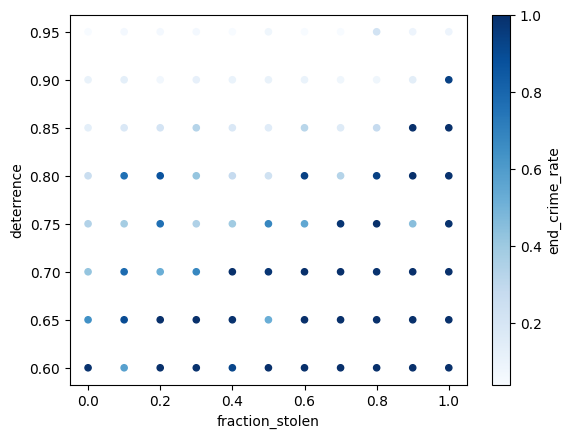

In [14]:
from vis import plot_end_crime_rate, plot_end_crime_rate


df_run.plot(kind='scatter', x='fraction_stolen', y='deterrence', c='end_crime_rate', colormap='Blues')


<Axes: xlabel='fraction_stolen', ylabel='deterrence'>

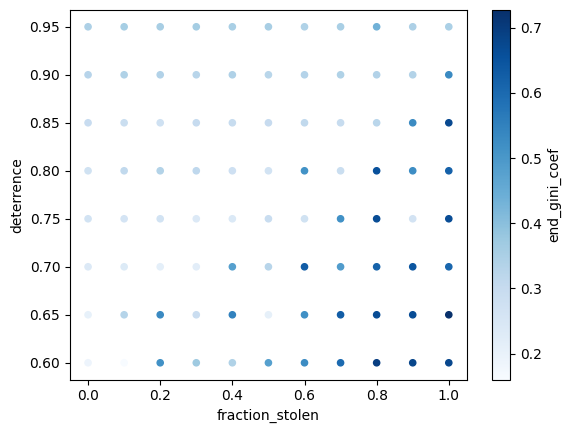

In [16]:
df_run.plot(kind='scatter', x='fraction_stolen', y='deterrence', c='end_gini_coef', colormap='Blues')

<Axes: xlabel='end_gini_coef', ylabel='end_crime_rate'>

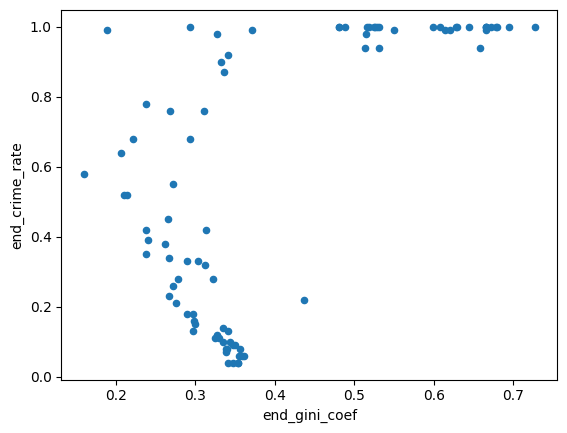

In [17]:
df_run.plot(kind='scatter', x='end_gini_coef', y='end_crime_rate')

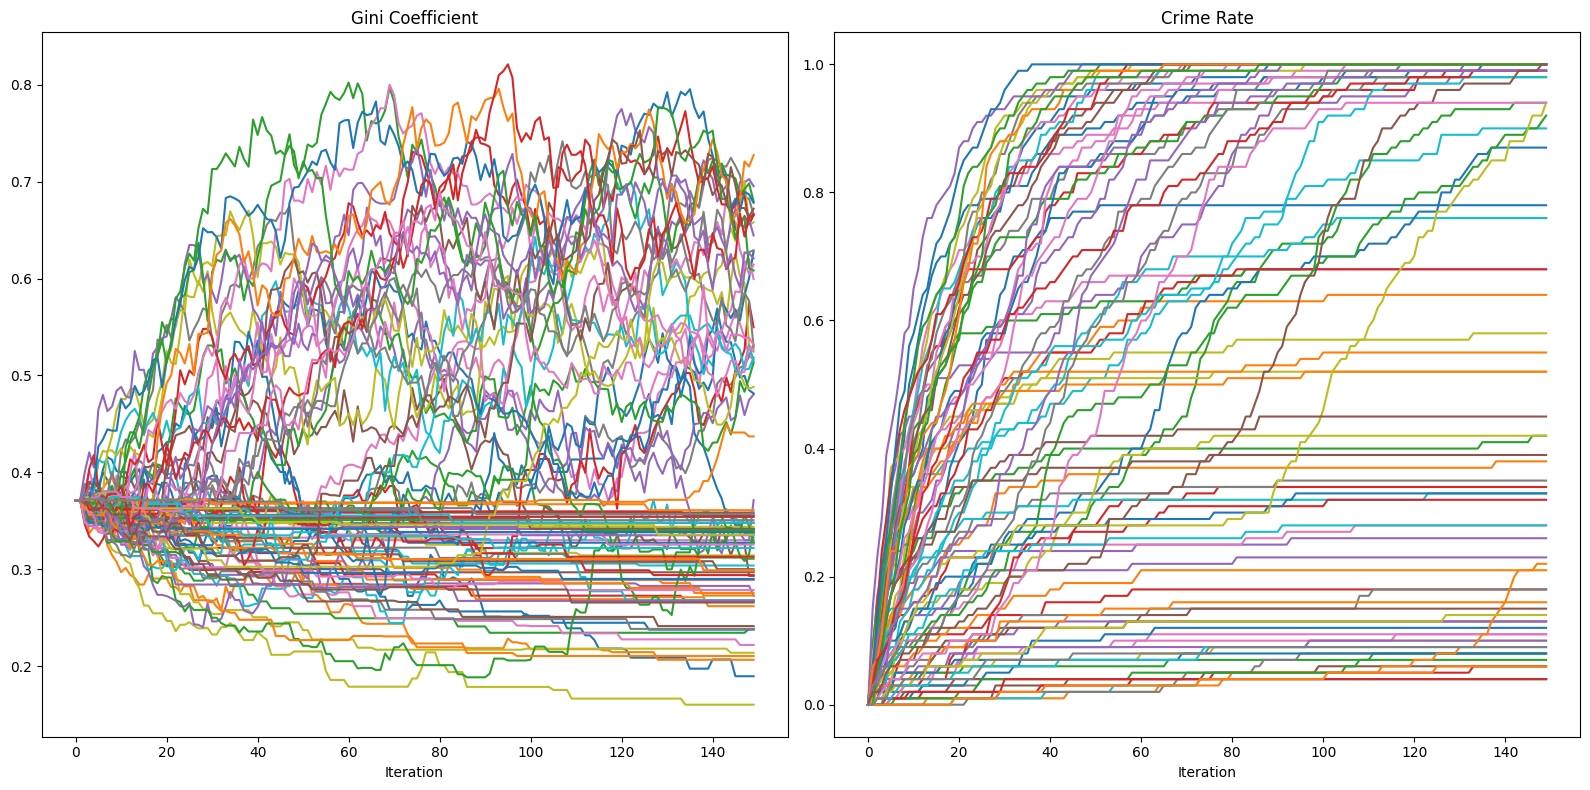

In [20]:
from vis import plot_run
import pandas as pd

plot_run(results)

<Axes: xlabel='fraction_stolen', ylabel='deterrence'>

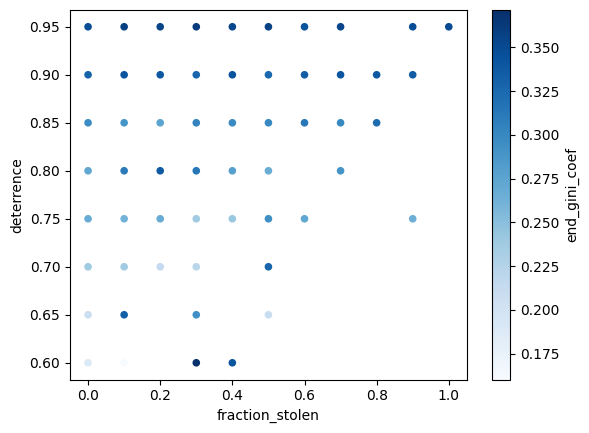

In [28]:
df_run.loc[df_run.end_gini_coef < 0.4].plot(kind='scatter', x='fraction_stolen', y='deterrence', c='end_gini_coef', colormap='Blues')

In [26]:
stable_selection = df_run.loc[df_run.end_gini_coef < 0.4, :].index
stable_selection

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39,
       41, 42, 43, 44, 45, 46, 47, 51, 53, 54, 55, 60, 61, 62, 63, 69, 70, 75,
       78, 79, 87],
      dtype='int64', name='run_id')

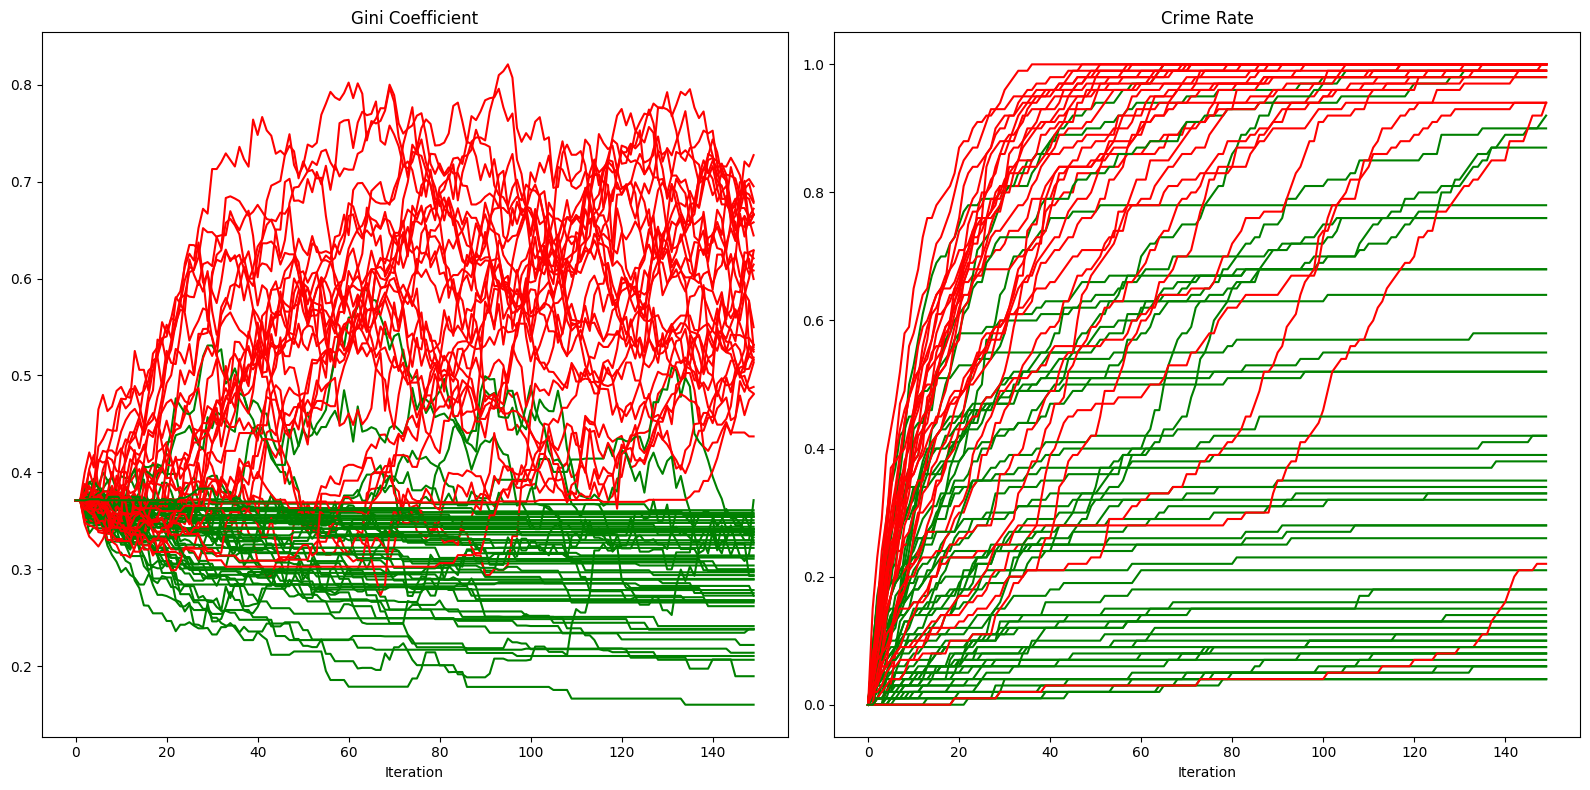

In [27]:
fig, ax = plt.subplots(ncols = 2, figsize=[16, 8])

for run_data in results:
    run_id = run_data['run_id']
    params = run_data['param']
    df_model = run_data['df_model']
    #df_agent = run_data['df_agent']
    if run_id in stable_selection:
        ax[0].plot(df_model.index, df_model['gini_coef'], label=f'Run {run_id}', c = 'g')
        ax[1].plot(df_model.index, df_model['crime_rate'], label=f'Run {run_id}', c = 'g')
    else:
        ax[0].plot(df_model.index, df_model['gini_coef'], label=f'Run {run_id}', c = 'r')
        ax[1].plot(df_model.index, df_model['crime_rate'], label=f'Run {run_id}', c = 'r')

ax[0].set_title('Gini Coefficient')
ax[1].set_title('Crime Rate')
ax[0].set_xlabel('Iteration')
ax[1].set_xlabel('Iteration')
fig.tight_layout()
#ax.legend()